Grand comparison of different noise levels, sample sizes and distance metrics

In [1]:

from typing import List
import mhn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.cluster
import RandomMHNGenerator as rmg
import ClusterableMhnGenerator as cmg
import EventDistanceMeasurer as edm
import mhn_tools

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


(<matplotlib.image.AxesImage at 0x1a041232810>,
 <matplotlib.colorbar.Colorbar at 0x1a0414c5e80>)

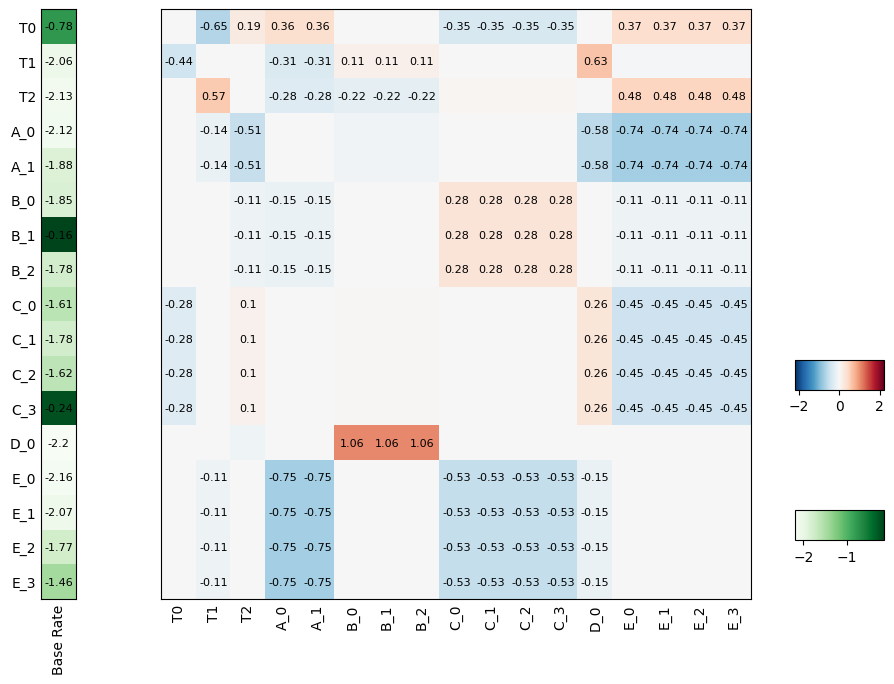

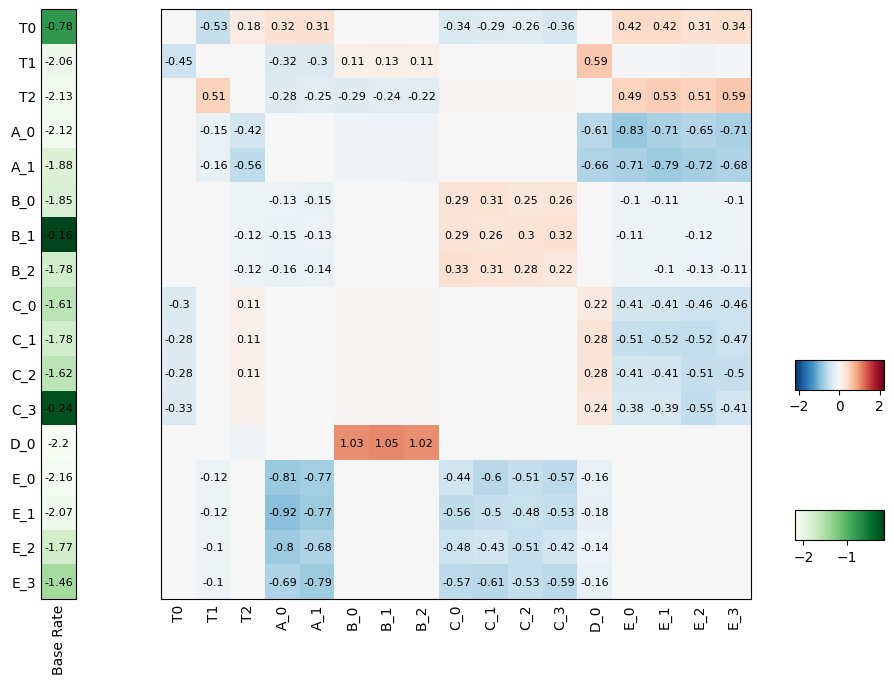

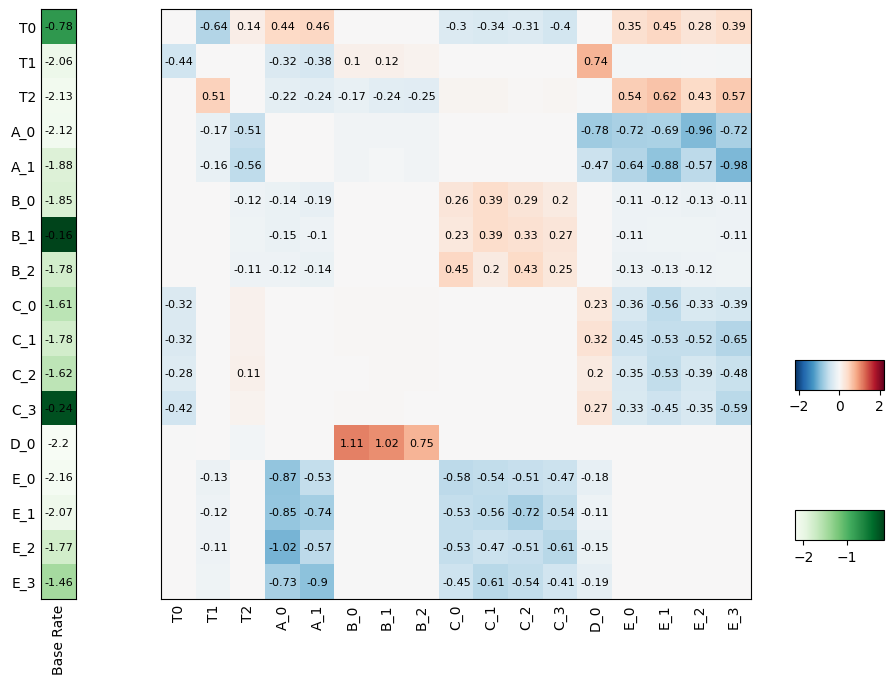

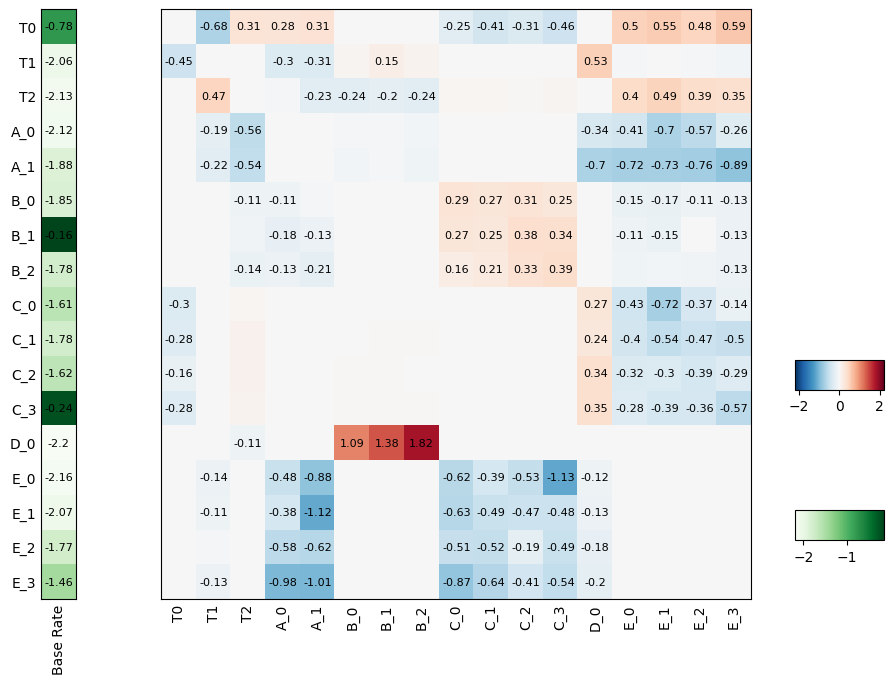

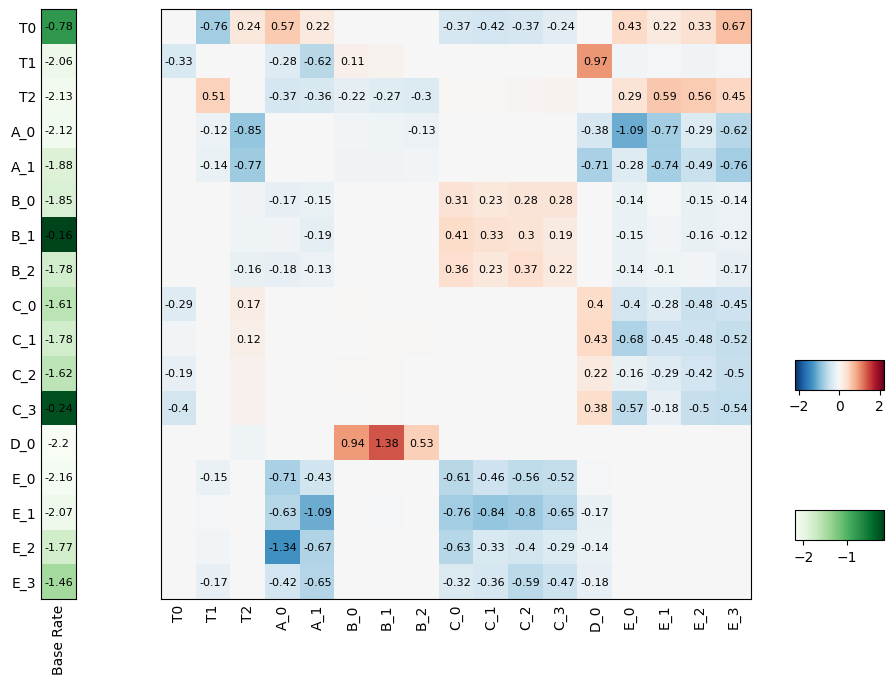

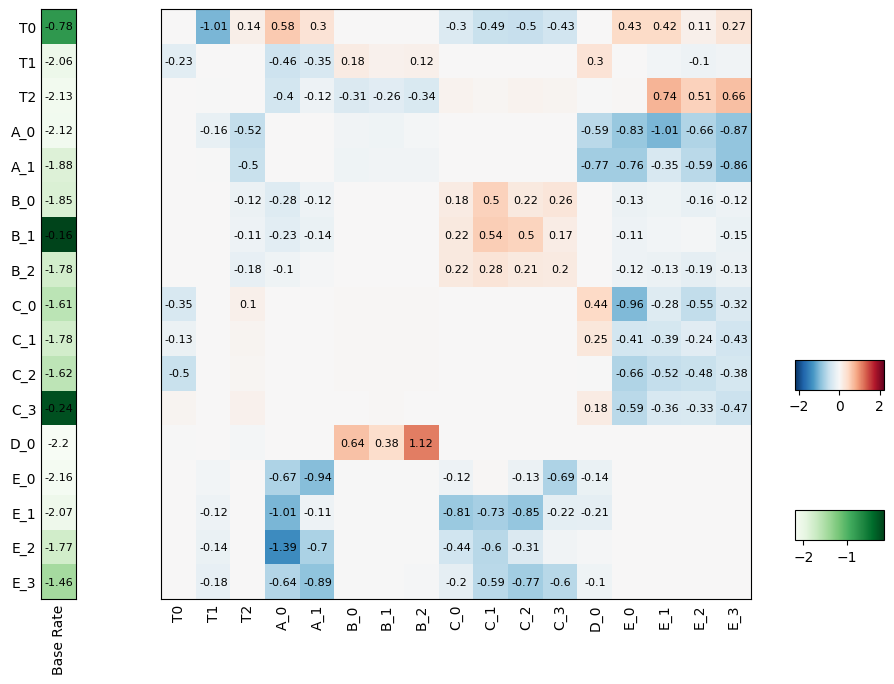

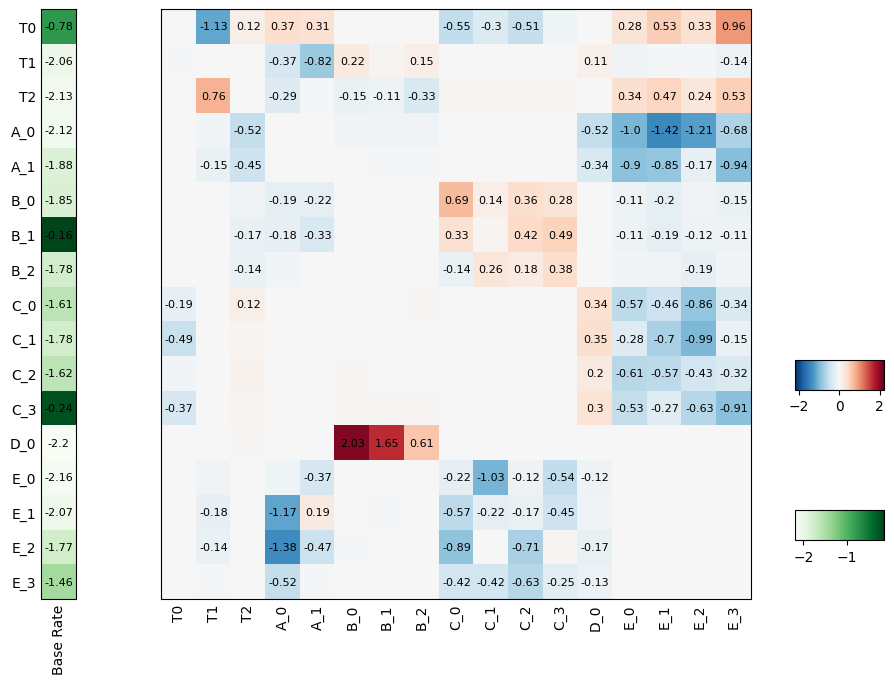

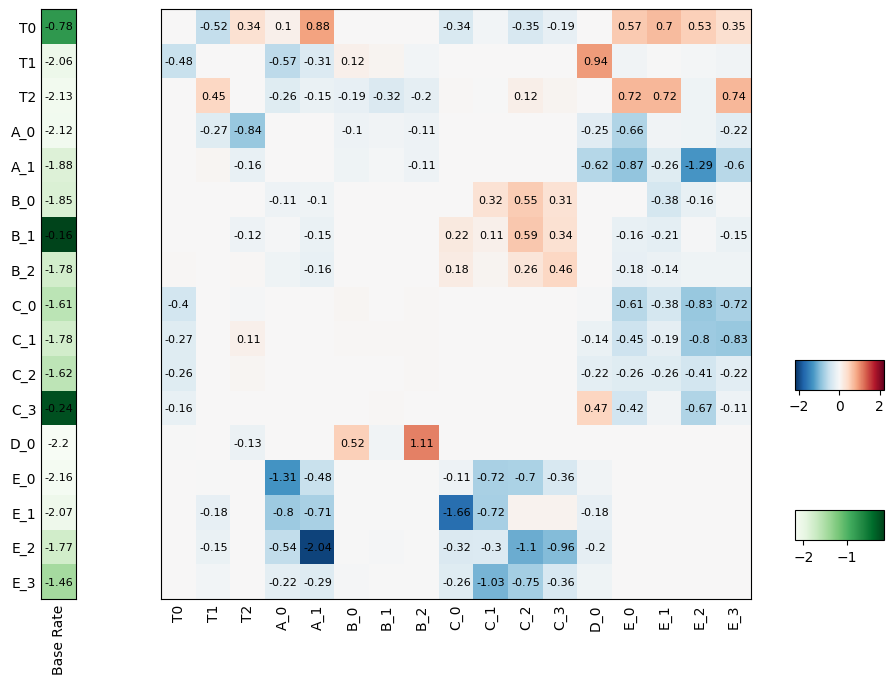

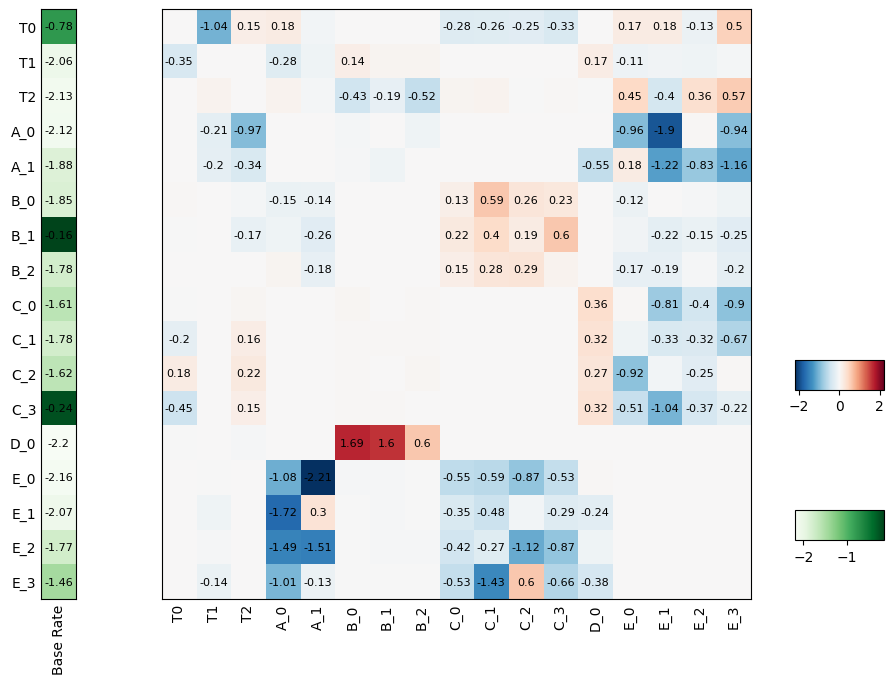

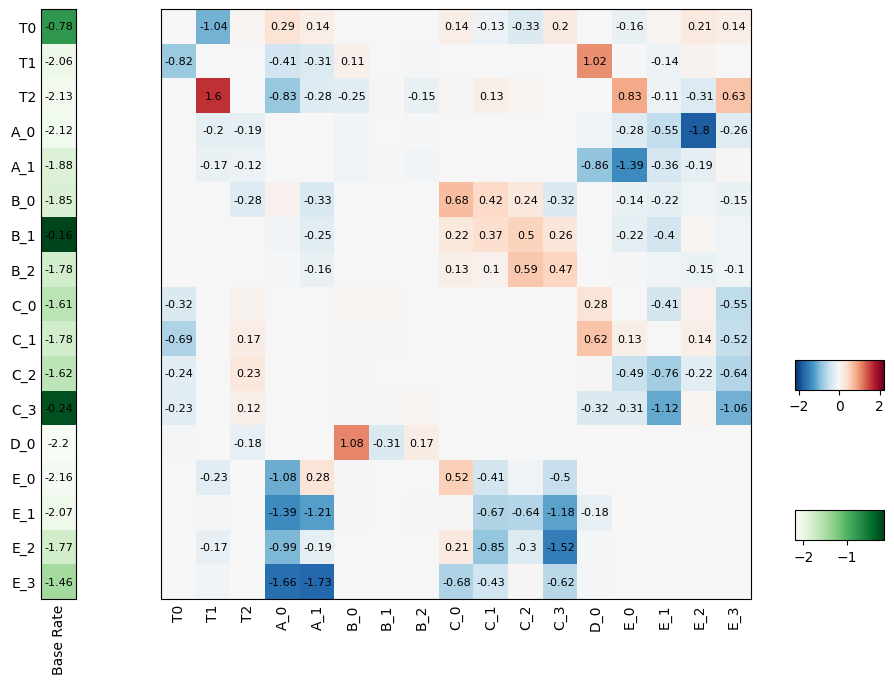

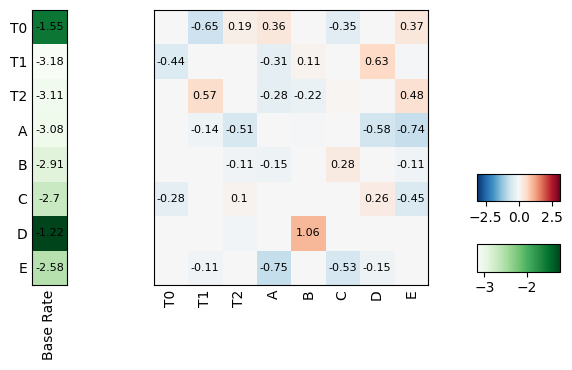

In [2]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.loadfrom("mbonart_checkpoints/rmg1")
cl_generator.setClusterMHN(rand_generator.getMHN())
given_clustersizes=[2,3,4,1,4]
cl_generator.splitClusters(given_clustersizes)
cl_generator.randomizeBaseRates() 

test_events = cl_generator.getEvents(cmg.DOM.TEST)
events = cl_generator.getEvents(cmg.DOM.CLUSTER)


noise_levels=[i/10 for i in range(10)]
sample_sizes=[1000, 2500, 7500, 20000, 50000, 100000]

np.random.seed(31415)
noisy_mhns: List[mhn.model.cMHN] = [cl_generator.get_noisy_MHN(amplitude= noise_level) for noise_level in noise_levels]

sampled_datas :List[List[pd.DataFrame]]=[]
sampled_datas=[[noisy_mhn.sample_artificial_data(sample_size, as_dataframe=True) for sample_size in sample_sizes] for noisy_mhn in noisy_mhns]
    

for noisy_mhn in noisy_mhns:
    noisy_mhn.plot()

rand_generator.getMHN().plot()

Train all EventDistanceMeasurers

In [3]:
all_dist_measurers:List[List[edm.EventDistanceMeasurer]] = [[edm.getDistMeasurer(sampled_data, cut_first_col=False) for sampled_data in row] for row in sampled_datas]


0x1.0bc8a665f87bbp+62
Directory for storage is edm_0bc8a665f87bb/T0_T1_T2
check if mbonart_checkpoints/edm_0bc8a665f87bb/T0_T1_T2   does exist
training MHN for event A_0
training MHN for event A_1
training MHN for event B_0
training MHN for event B_1
training MHN for event B_2
training MHN for event C_0
training MHN for event C_1
training MHN for event C_2
training MHN for event C_3
training MHN for event D_0
training MHN for event E_0
training MHN for event E_1
training MHN for event E_2
training MHN for event E_3
0x1.a122e7fdede17p+63
Directory for storage is edm_a122e7fdede17/T0_T1_T2
check if mbonart_checkpoints/edm_a122e7fdede17/T0_T1_T2   does exist
training MHN for event A_0
training MHN for event A_1
training MHN for event B_0
training MHN for event B_1
training MHN for event B_2
training MHN for event C_0
training MHN for event C_1
training MHN for event C_2
training MHN for event C_3
training MHN for event D_0
training MHN for event E_0
training MHN for event E_1
training MHN

KeyboardInterrupt: 